In [21]:
# http://cardsorting.net/tutorials/25.csv

data <- read.csv(url("http://cardsorting.net/tutorials/25.csv"))

In [22]:
unique(data[c("Category")])

,Category
,<chr>
1,Sides
2,meat
3,dinners
4,Snacks
5,breakfasat
6,Fruit and veggie
7,Drinks
8,fruits
9,beverages


In [2]:
head(data)

,Uniqid,Category,Startdate,Starttime,Endtime,QID,Carrots,Apple,Banana,Bread,⋯,Rice,Salmon,Soda,Spaghetti,Steak,Waffle,Water,Watermelon,Yogurt,Comment
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<lgl>
1,2249,Sides,10/8/2014,13:09:10,13:13:10,A1Q77WXLOKP6T,0,0,0,1,⋯,1,0,0,0,0,0,0,0,0,NA
2,2249,meat,10/8/2014,13:09:10,13:13:10,A1Q77WXLOKP6T,0,0,0,0,⋯,0,1,0,0,1,0,0,0,0,NA
3,2249,dinners,10/8/2014,13:09:10,13:13:10,A1Q77WXLOKP6T,0,0,0,0,⋯,0,0,0,1,0,0,0,0,0,NA
4,2249,Snacks,10/8/2014,13:09:10,13:13:10,A1Q77WXLOKP6T,0,0,0,0,⋯,0,0,0,0,0,0,0,0,1,NA
5,2249,breakfasat,10/8/2014,13:09:10,13:13:10,A1Q77WXLOKP6T,0,0,0,0,⋯,0,0,0,0,0,1,0,0,0,NA
6,2249,Fruit and veggie,10/8/2014,13:09:10,13:13:10,A1Q77WXLOKP6T,1,1,1,0,⋯,0,0,0,0,0,0,0,1,0,NA


In [3]:
data <- data[, -c(1:6)]# delete columns 1 through 6
data <- data[,-ncol(data)]

In [4]:
head(data)

,Carrots,Apple,Banana,Bread,Broccoli,Butter,Cake,Cereal,Cheese,Chicken,⋯,Pretzels,Rice,Salmon,Soda,Spaghetti,Steak,Waffle,Water,Watermelon,Yogurt
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,0,0,1,0,1,0,0,0,0,⋯,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,⋯,0,0,1,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,1,0,1,0,⋯,1,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,1,0,0,⋯,0,0,0,0,0,0,1,0,0,0
6,1,1,1,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,1,0


In [7]:
data <- data.frame(data)

In [8]:
typeof(data)

[1] "list"

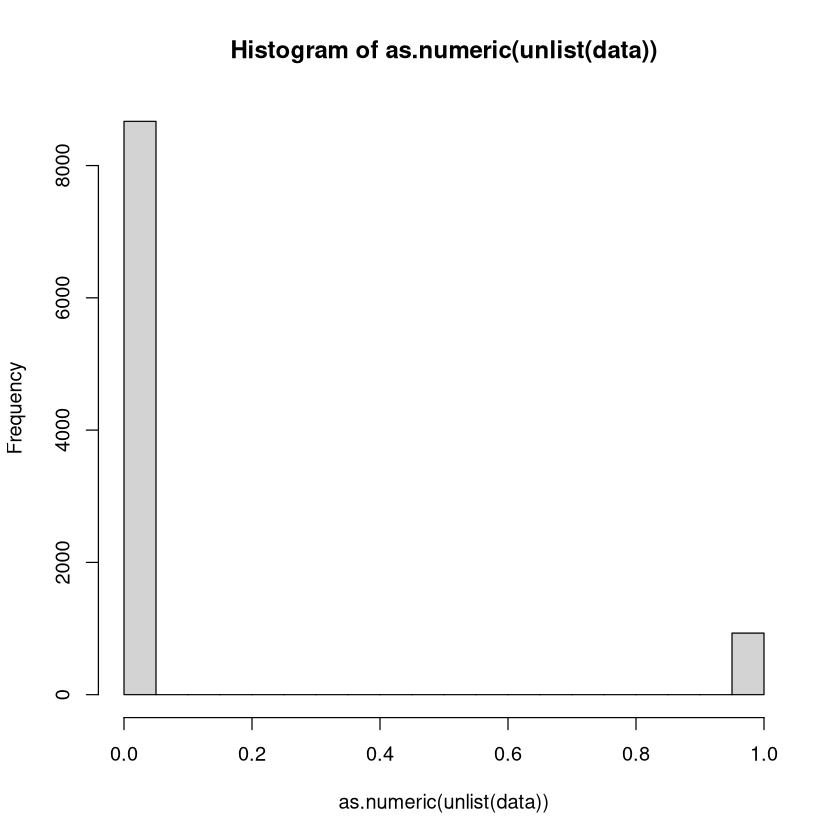

In [20]:
hist(as.numeric(unlist(data)), labels=c(0,1))